# DSC530 Final Project

## Exploring Offensive Stats of the 2019 NCAA Division 1-A Football Season

##### Bryan Rogers
##### Bellevue University
##### DSC530: Data Exploration and Analysis

Hypothesis: that the more plays ran during a season, the more yards likely to be accumlated and thus a more successful season. 

In [77]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

Downloaded thinkstats2.py
Downloaded thinkplot.py


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot

In [42]:
# Load the dataset
cfb_data = pd.read_csv('College_Football_Dataset.csv')
cfb_data.head()

,UniversityName,Conference,Year,TeamID,CMP,ATT,YDS,CMPPercent,YPA,LNG,TD,INT,SACK,SYL,RTG,R_ATT,R_AVG,TOTAL_PLAYS,RUN_PERCENT,PASS_PERCENT
0,AirForce,Mountian West,2019,AirForce2019,68,126,1602,54.0,12.7,81,14,6,4,-22,187.9,755,5.1,881,85.70%,14.30%
1,Akron,MAC,2019,Akron2019,204,398,2344,51.3,5.9,87,12,14,58,-328,103.6,327,1.7,725,45.10%,54.90%
2,Alabama,SEC,2019,Alabama2019,287,406,4449,70.7,11.0,85,49,6,12,-81,199.6,436,5.0,842,51.78%,48.22%
3,AppalachianState,SunBelt,2019,AppalachianState2019,231,370,2824,62.4,7.6,73,30,6,18,-107,150.1,599,5.4,969,61.82%,38.18%
4,Arizona,PAC-12,2019,Arizona2019,261,422,3193,61.8,7.6,75,23,12,33,-191,137.7,451,4.6,873,51.66%,48.34%


In [43]:
cfb_data.info

<bound method DataFrame.info of        UniversityName     Conference  Year                TeamID  CMP  ATT  \
0            AirForce  Mountian West  2019          AirForce2019   68  126   
1               Akron            MAC  2019             Akron2019  204  398   
2             Alabama            SEC  2019           Alabama2019  287  406   
3    AppalachianState        SunBelt  2019  AppalachianState2019  231  370   
4             Arizona         PAC-12  2019           Arizona2019  261  422   
..                ...            ...   ...                   ...  ...  ...   
123   WesternKentucky           CUSA  2019   WesternKentucky2019  313  469   
124   WesternMichigan            MAC  2019   WesternMichigan2019  246  413   
125      WestVirginia          Big12  2019      WestVirginia2019  289  454   
126         Wisconsin          Big10  2019         Wisconsin2019  246  351   
127           Wyoming   MountianWest  2019           Wyoming2019  120  256   

      YDS  CMPPercent   YPA  LN

In [44]:
cfb_data.isnull().sum()

UniversityName    0
Conference        0
Year              0
TeamID            0
CMP               0
ATT               0
YDS               0
CMPPercent        0
YPA               0
LNG               0
TD                0
INT               0
SACK              0
SYL               0
RTG               0
R_ATT             0
R_AVG             0
TOTAL_PLAYS       0
RUN_PERCENT       0
PASS_PERCENT      0
dtype: int64

In [45]:
cfb_data2 = cfb_data.rename(columns={'UniversityName': 'University', 'CMP': 'Completions', 'ATT': 'Attempts', 'YDS': 'Yards', 'CMPPercent': 'Completion_Percentage',
                         'YPA': 'Yards_per_Attempt', 'LNG': 'Longest_Completions', 'TD': 'Touchdowns', 'INT': 'Interceptions', 'SACK': 'Sacks',
                         'SYL': 'Sack_Yards_Lost', 'RTG': 'Rushing_Yards_per_Game', 'R_ATT': 'Rushing_Attempts', 'R_AVG': 'Average_per_Rush',
                         'TOTAL_PLAYS': 'Total_Plays', 'RUN_PERCENT': 'Run_Percentage', 'PASS_PERCENT': 'Pass_Percentage'})
                                                    

In [46]:
cfb_data2.head()

,University,Conference,Year,TeamID,Completions,Attempts,Yards,Completion_Percentage,Yards_per_Attempt,Longest_Completions,Touchdowns,Interceptions,Sacks,Sack_Yards_Lost,Rushing_Yards_per_Game,Rushing_Attempts,Average_per_Rush,Total_Plays,Run_Percentage,Pass_Percentage
0,AirForce,Mountian West,2019,AirForce2019,68,126,1602,54.0,12.7,81,14,6,4,-22,187.9,755,5.1,881,85.70%,14.30%
1,Akron,MAC,2019,Akron2019,204,398,2344,51.3,5.9,87,12,14,58,-328,103.6,327,1.7,725,45.10%,54.90%
2,Alabama,SEC,2019,Alabama2019,287,406,4449,70.7,11.0,85,49,6,12,-81,199.6,436,5.0,842,51.78%,48.22%
3,AppalachianState,SunBelt,2019,AppalachianState2019,231,370,2824,62.4,7.6,73,30,6,18,-107,150.1,599,5.4,969,61.82%,38.18%
4,Arizona,PAC-12,2019,Arizona2019,261,422,3193,61.8,7.6,75,23,12,33,-191,137.7,451,4.6,873,51.66%,48.34%


I will be examiming the offensive statistics from the 2019 NCAA Football season and deteriming which stats best represent a successful season. The five most important variables that I will be looking at include:

* Yards
* Touchdowns
* Rushing Yards per Game
* Total Plays
* Interceptions

Describe what the 5 variables mean in the dataset 

* Yards - The amount of yards gained in the air over the duration of an entire season
* Touchdowns - The amount of touchdowns scored on offense over the duration of an entire season
* Rushing Yards per Game - The average rushing yards gained by each school per game
* Total Plays - The amount of plays ran during the game on offense
* Interceptions - The amount of times the quaterback turned the ball over via interception, allowing higher risk of giving up points

### Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

### Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

##### Histogram 1 - Yards

Text(0, 0.5, 'Frequency')

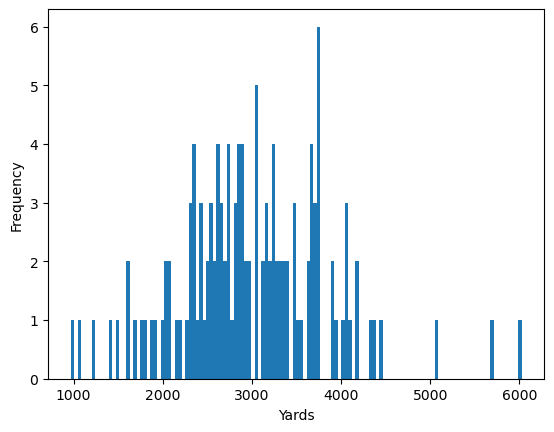

In [47]:
fig, ax = plt.subplots()
plt.hist(cfb_data2.Yards, bins = 130)
ax.set_xlabel('Yards')
ax.set_ylabel('Frequency')

In [48]:
cfb_data2.Yards.mean()

2991.484375

In [49]:
cfb_data2.Yards.mode()

0    2611
1    2749
2    3748
Name: Yards, dtype: int64

In [50]:
cfb_data2.Yards.var()

698199.2595964567

In [51]:
cfb_data2.Yards.std()

835.5831853241523

##### Histogram 2 - Touchdowns

Text(0, 0.5, 'Frequency')

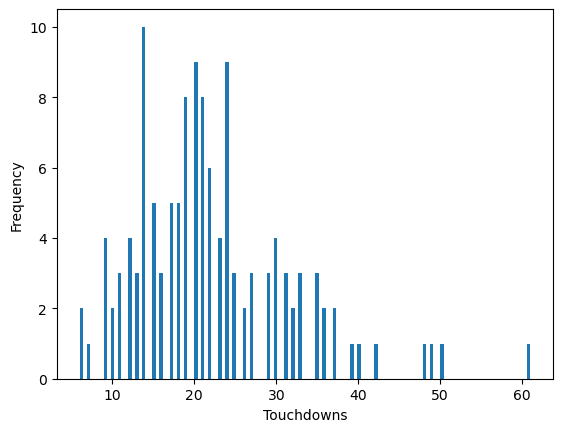

In [30]:
fig, ax = plt.subplots()
plt.hist(cfb_data2.Touchdowns, bins = 130)
ax.set_xlabel('Touchdowns')
ax.set_ylabel('Frequency')

In [52]:
cfb_data2.Touchdowns.mean()

22.0625

In [53]:
cfb_data2.Touchdowns.mode()

0    14
Name: Touchdowns, dtype: int64

In [54]:
cfb_data2.Touchdowns.var()

90.35826771653544

In [55]:
cfb_data2.Touchdowns.std()

9.505696592913926

##### Histogram 3 - Rushing Yards per Game

Text(0, 0.5, 'Frequency')

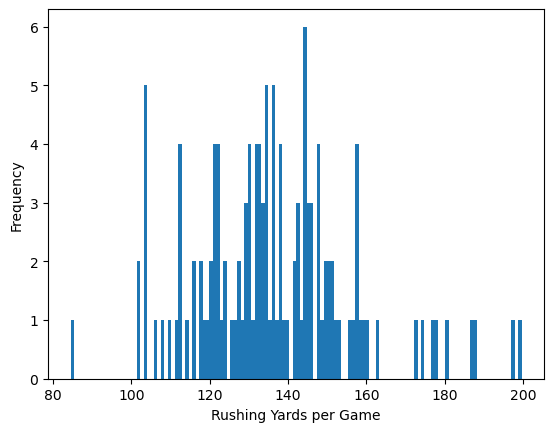

In [35]:
fig, ax = plt.subplots()
plt.hist(cfb_data2.Rushing_Yards_per_Game, bins = 130)
ax.set_xlabel('Rushing Yards per Game')
ax.set_ylabel('Frequency')

In [56]:
cfb_data2.Rushing_Yards_per_Game.mean()

136.4296875

In [57]:
cfb_data2.Rushing_Yards_per_Game.mode()

0    103.4
1    136.1
2    142.4
Name: Rushing_Yards_per_Game, dtype: float64

In [58]:
cfb_data2.Rushing_Yards_per_Game.var()

405.82084399606293

In [59]:
cfb_data2.Rushing_Yards_per_Game.std()

20.144995507471897

##### Histogram 4 - Total Plays

Text(0, 0.5, 'Frequency')

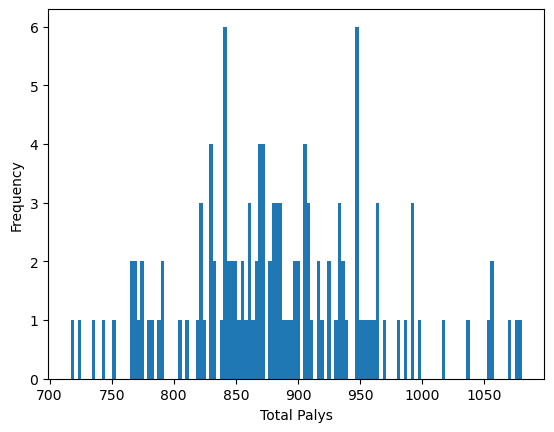

In [61]:
fig, ax = plt.subplots()
plt.hist(cfb_data2.Total_Plays, bins = 130)
ax.set_xlabel('Total Palys')
ax.set_ylabel('Frequency')

In [62]:
cfb_data2.Total_Plays.mean()

885.3359375

In [63]:
cfb_data2.Total_Plays.mode()

0    905
Name: Total_Plays, dtype: int64

In [64]:
cfb_data2.Total_Plays.var()

5830.193343996063

In [65]:
cfb_data2.Total_Plays.std()

76.35570276014793

##### Histogram 5 - Interceptions

Text(0, 0.5, 'Frequency')

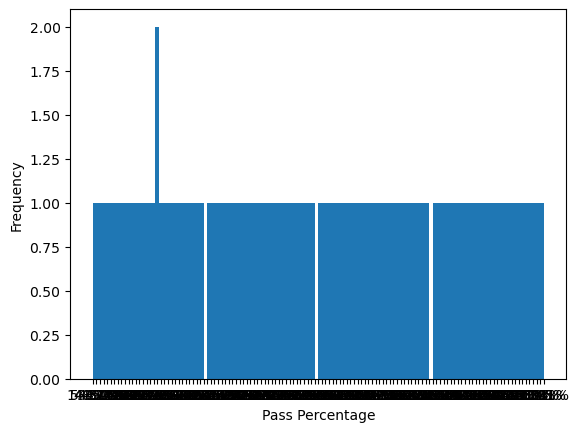

In [37]:
fig, ax = plt.subplots()
plt.hist(cfb_data2.Interceptions, bins = 130)
ax.set_xlabel('Interceptions')
ax.set_ylabel('Frequency')

In [66]:
cfb_data2.Interceptions.mean()

9.96875

In [67]:
cfb_data2.Interceptions.mode()

0    10
1    11
Name: Interceptions, dtype: int64

In [68]:
cfb_data2.Interceptions.var()

13.510826771653543

In [69]:
cfb_data2.Interceptions.std()

3.6757076559015873

### Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

In [129]:
low_yards = cfb_data2[cfb_data2.Yards < 2000]
high_yards = cfb_data2[cfb_data2.Yards > 5000]
low_yards_pmf = thinkstats2.Pmf(low_yards.Total_Plays)
high_yards_pmf = thinkstats2.Pmf(high_yards.Total_Plays)

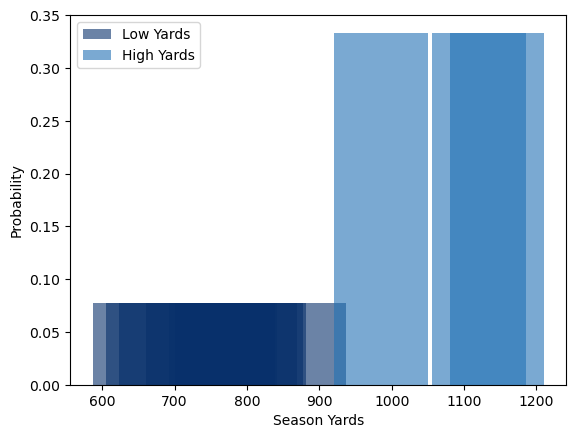

In [130]:
thinkplot.Hist(low_yards_pmf, align = 'right', width = 130, label = 'Low Yards' )
thinkplot.Hist(high_yards_pmf, align = 'left', width = 130, label = 'High Yards')
thinkplot.Config(xlabel = 'Season Yards',
ylabel='Probability')

The above PMF showcases the probability of a certian amount of yards gained during the course of a season depending on the amount of total plays ran during the season. The data is devided into two groups of teams with yardage less than 2000 during a season and teams with yardage higher than 5000 during a season. This outcome aligns with the hypothesis that the more plays ran during a season, the more yards likely to be accumlated and thus a more successful season. 

### Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

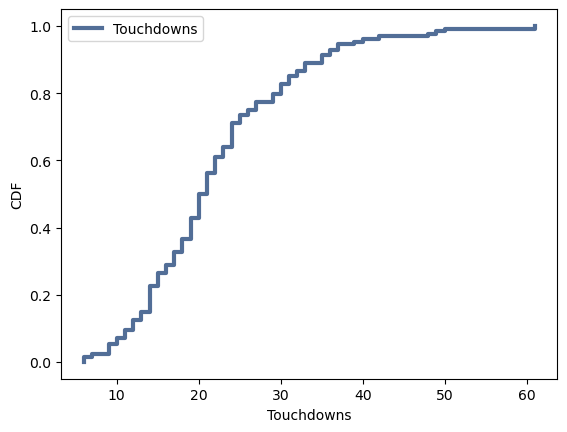

<Figure size 800x600 with 0 Axes>

In [82]:
cdf = thinkstats2.Cdf(cfb_data2.Touchdowns, label = 'Touchdowns')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel = 'Touchdowns', ylabel = 'CDF')

The CDF displayed above shows a slightly normal distribution with the majority of results showing a gradual increase around the 50th percentile and plateauing right around 100. This graph shows that at the 50th percentile is right around 20 Touchdowns recorded during the season, which lines up with the mean of 22. I think these results agree with the eariler PMF about higher yardage leading to a more successful season, there is evidence to show that there is a strong correlation bewteen collecting a large amount of yardage and scoring more touchdowns, leading to more successful performance. 

### Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

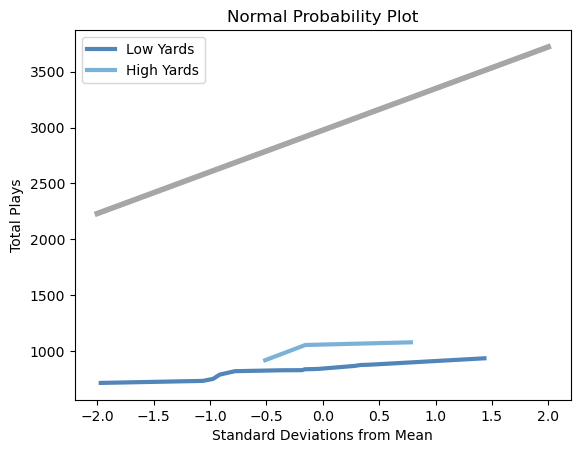

In [91]:
mean, var = thinkstats2.TrimmedMeanVar(cfb_data2.Yards, p = 0.20)
std = np.sqrt(var)

xs = [-2, 2]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth = 4, color = "0.5")

thinkplot.PrePlot(2)
xs, ys = thinkstats2.NormalProbability(low_yards.Total_Plays)
thinkplot.Plot(xs, ys, label = "Low Yards")

xs, ys = thinkstats2.NormalProbability(high_yards.Total_Plays)
thinkplot.Plot(xs, ys, label = "High Yards")
thinkplot.Config(
    title = "Normal Probability Plot",
    xlabel = "Standard Deviations from Mean",
    ylabel = "Total Plays",)

I decided to run a Normal Probility Plot comparing low and high yards during a season with the amount of plays ran during the year. This is inline with the PMF shown eariler. The results show that there is high concentration of teams who record higher yardage outputs with a smaller standard deviations, where as teams that have a lower yardage output have more variance in standard deviations from the mean. The gray line represents a normal distribution, and the results clearly show that is not a normal distribution. The plot would skew more towards normaility if the total plays y axis was scaled more to represent the distribution of total yards. 

### Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

##### Scatter plot 1 - Touchdowns vs Total Plays

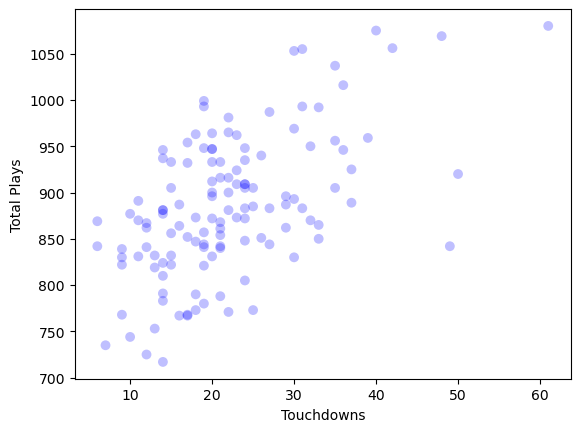

In [99]:
thinkplot.Scatter(cfb_data2.Touchdowns, cfb_data2.Total_Plays, alpha = 0.25, s = 50)
thinkplot.Config(xlabel = "Touchdowns", ylabel = "Total Plays")

In [103]:
print("Covariance:", thinkstats2.Cov(cfb_data2.Touchdowns, cfb_data2.Total_Plays))
print("Pearson's Correlation:", thinkstats2.Corr(cfb_data2.Touchdowns, cfb_data2.Total_Plays))
print("Spearman’s Correlation:", thinkstats2.SpearmanCorr(cfb_data2.Touchdowns, cfb_data2.Total_Plays))

Covariance: 406.70556640625
Pearson's Correlation: 0.5647561101813051
Spearman’s Correlation: 0.5294385678719321


The scatterplot above showcases the comparassion between Total Plays during the season, and Touchdowns scored. The results of this scatterplot are not surprising, as it looks like there is an average correlation for both Pearson and Spearman. It shows that there is a large cluster in which the more total plays ran, the more touchdowns scored, with a few outliers. In this situation, the outliers shown are most likely to be championship contenders due to the fact that touchdowns directly relate to points scored, whereas total plays are and indirect relationship to points scored.  

##### Scatter plot 2 - Interceptions vs Total Plays

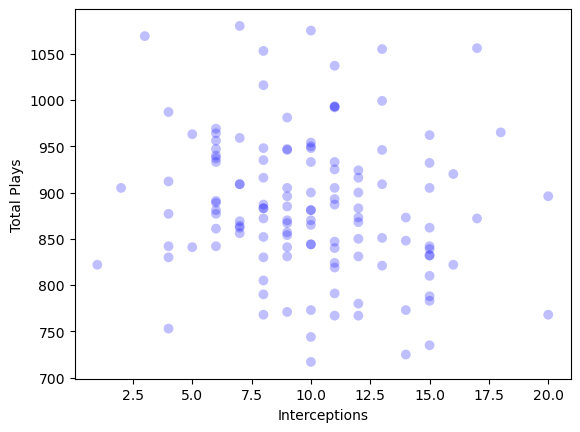

In [100]:
thinkplot.Scatter(cfb_data2.Interceptions, cfb_data2.Total_Plays, alpha = 0.25, s = 50)
thinkplot.Config(xlabel = "Interceptions", ylabel = "Total Plays")

In [104]:
print("Covariance:", thinkstats2.Cov(cfb_data2.Interceptions, cfb_data2.Total_Plays))
print("Pearson's Correlation:", thinkstats2.Corr(cfb_data2.Interceptions, cfb_data2.Total_Plays))
print("Spearman’s Correlation:", thinkstats2.SpearmanCorr(cfb_data2.Interceptions, cfb_data2.Total_Plays))

Covariance: -42.481689453125
Pearson's Correlation: -0.1525546981860215
Spearman’s Correlation: -0.1729958933403151


The scatterplot above showcases the comparassion between Total Plays during the season, and Interceptions thrown during the season. The results of this scatterplot are somewhat surprising, as it looks like there is a negative correlation for both Pearson and Spearman. It shows that there is a even distribution throughout all total plays during the season, and no true outliers. This is a surprising outcome to me, because this shows that there no ture correlation between the amount of plays ran and the amount of interceptions thrown during the season.  

### Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

For my hypothesis test, I decided to run a correlation test to determine if there is a true correlation bewteen the amount of yards thrown and the intereptions thrown, based off of the results of Pearson's and Spearman's correlation bewteen Total Plays and Interceptions. I chose CorrelationPermute because it shuffles the variables and runs a simulation of the shuffled values and determines the correlations of the values. 

In [105]:
class CorrelationPermute(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat
    
    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [115]:
data = cfb_data2.Yards, cfb_data2.Interceptions
test = CorrelationPermute(data)
pvalue = test.PValue(iters = 5000)
print(pvalue)

0.141


The results of the correlation hypothesis test shows that with the low results, there is alomost no correlation between the amount of yards thrown and the number of interceptions thrown, thus contiuning to prove that there in no connection between the two variables. This shows that interceptions can happen at any time and have little to zero effect on the amount of yards thrown or total plays recorded during the course of a season. 

### For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [132]:
import statsmodels.formula.api as smf

model = smf.ols('Yards ~ Rushing_Yards_per_Game + Touchdowns', data = cfb_data2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yards   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     164.0
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           1.12e-35
Time:                        13:22:37   Log-Likelihood:                -959.91
No. Observations:                 128   AIC:                             1926.
Df Residuals:                     125   BIC:                             1934.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1630.4305    319.097      5.110      0.000     998.898    2261.963
Rushing_Yards_per_Game    -2.8467      3.009     -0.946      0.346      -8.801       3.108
Touchdowns                79.2940      6.376     12.436      0.000      66.674      91.914
==============================================================================
Omnibus:                        0.575   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.750   Jarque-Bera (JB):                0.717
Skew:                          -0.105   Prob(JB):                        0.699
Kurtosis:                       2.699   Cond. No.                     1.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For my regression analysis, I decided to use mulitple exploratory variables: Yards, Rushing Yards per Game, and Touchdowns. The results of this regression analysis shows that there is a large Standard Error in both Rushing Yards per Game and Touchdowns. The P-values are very low, all the way down to 0.  